In [33]:
import os
import pandas as pd

In [34]:
# Importamos los datos
ubicacion = r"/content/drive/MyDrive/Colab Notebooks/Regresión/Datos/"
os.chdir(ubicacion)
data = pd.read_csv("Datos_coches_numerico.csv")

In [35]:
data = data.dropna(axis=0)
# Comprobamos que no hay valores perdidos.
data.isnull().sum()
# Con esta funcion vemos si existen (TRUE) o no (FALSE) datos perdidos
data.isnull().any().any()

False

In [36]:
data = data.drop(["Combustible"], axis=1)
data = data.rename(columns={"B": "Combustible"})
# El primer paso es conocer nuestros datos.
# Realizamos una primera visualizacion.
# EL objetivo es precedir la dureza del hormigón.
print(data)

      Unnamed: 0  Precio                                             Título  \
0              0   11999                                  Renault Clio 2017   
1              1    5499                  Renault Scenic Diesel 1.5dci 2010   
2              2    7000                               Renault mascoot 2006   
3              3   14890                                     Renault Megane   
4              4   20990                                     Renault Espace   
...          ...     ...                                                ...   
1893        1975   14490     Renault Captur Zen Energy dCi 66kW (90CV) eco2   
1894        1976    2000                                Renault Laguna 2007   
1895        1977   30950  Renault Arkana RS Line E-Tech Híbrido 107 kW (...   
1896        1978    6000                     Renault Scenic Septiembre 2006   
1897        1979   18745       Renault Kadjar Zen Energy TCe 96 kW (130 CV)   

          Cambio  Potencia   Año  kilometraje Combu

In [37]:
one_hot = pd.get_dummies(data['Combustible'])
# Drop column B as it is now encoded
data = data.drop('Combustible', axis=1)
# Join the encoded df
data = data.join(one_hot)

In [38]:
data["Cambio"].replace("Automático", 1, inplace=True)
data["Cambio"].replace("Manual", 0, inplace=True)

In [39]:
# Visualizamos los 10 primero datos, de una manera mas comoda.
data.head(n=10)

,Unnamed: 0,Precio,Título,Cambio,Potencia,Año,kilometraje,Diésel,Eléctrico,Gasolina,Hybrid,Otros
0,0,11999,Renault Clio 2017,0,75,2017,67000,0,0,1,0,0
1,1,5499,Renault Scenic Diesel 1.5dci 2010,0,110,2010,200000,1,0,0,0,0
2,2,7000,Renault mascoot 2006,0,160,2006,561055,1,0,0,0,0
3,3,14890,Renault Megane,0,110,2018,66258,1,0,0,0,0
4,4,20990,Renault Espace,0,130,2016,84258,1,0,0,0,0
5,5,11500,Renault Megane 2017,0,90,2017,91975,1,0,0,0,0
6,6,14099,Renault Clio Limited Energy dCi,0,90,2018,18669,1,0,0,0,0
7,7,9999,Renault Clio 1.2 Limited,0,73,2017,131208,0,0,1,0,0
8,8,15990,Renault Clio GLP,0,101,2020,54984,0,0,0,0,1
9,9,9999,Renault Clio Technofeel TCe 90,0,90,2015,96940,0,0,1,0,0


In [40]:
# Realizamos un resumen estadistico de las variables.
descripcion = data.describe(include="all").T

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 0 to 1897
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1796 non-null   int64 
 1   Precio       1796 non-null   int64 
 2   Título       1796 non-null   object
 3   Cambio       1796 non-null   int64 
 4   Potencia     1796 non-null   int64 
 5   Año          1796 non-null   int64 
 6   kilometraje  1796 non-null   int64 
 7   Diésel       1796 non-null   uint8 
 8   Eléctrico    1796 non-null   uint8 
 9   Gasolina     1796 non-null   uint8 
 10  Hybrid       1796 non-null   uint8 
 11  Otros        1796 non-null   uint8 
dtypes: int64(6), object(1), uint8(5)
memory usage: 185.6+ KB


# Representaciones gráficas de los datos

In [42]:
# Importaciones para graficas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

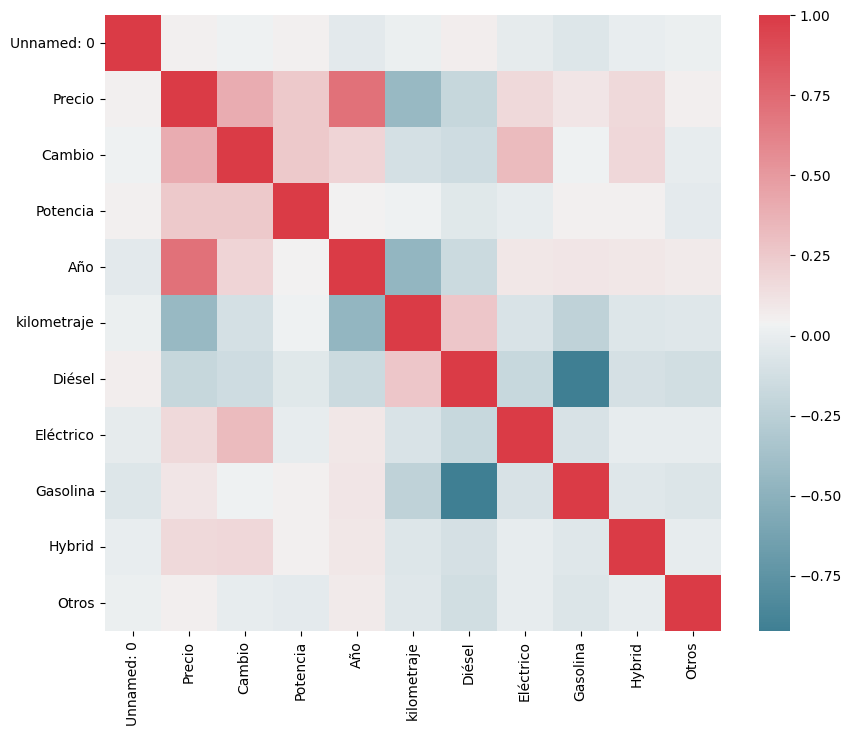

In [43]:
# Representaciones gráficas de los datos:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr(numeric_only = True)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [44]:
# Este gráfico no admite NAs
#datoscompletos = data.dropna()
#sns.pairplot(datoscompletos)

Intentamos "limitar" nuestro estudio a los datos para los que tiene sentido hacer un modelo de predicción

In [45]:
# Quitar los que no son renault
data = data[data["Título"].str.contains("enault")]

In [46]:
# Quedarnos con los precios entre 1000 y 25000
data = data[data['Precio'].between(1000, 25000)]
# kilómetros entre 1000 y 300000
data = data[data['kilometraje'].between(1000, 300000)]

In [47]:
data = data[data["Año"] > 1995]
data = data[data["Potencia"] < 450]

In [48]:
data = data.drop('Título', axis=1)
data = data.drop('Unnamed: 0', axis=1)

Una vez que comprobamos que los datos son correctos pasamos a la modelizacion, utilizando tecnicas de machine learning.

Cuando realizamos un modelo predictivo es necesario conocer la fiabilidad esperada con datos futuros.

Para ello podemos hacer una particion y utilizar unos datos para entrenar el modelo (train) y otros para comprobar la fiabilidad (test).

# Modelo de Regresión

Realizamos una particion simple de los datos.

800 datos para entrenar el modelo y 230 para comprobar su fiabilidad.

El siguiente paso es realizar la particion de forma aleatoria.

Primero separamos la variable dependiente del resto.

In [62]:
objetivo = "Precio"
y = data[objetivo]
X = data.drop([objetivo], axis=1)

Realizamos la particion dejando un 75% para entrenar y un 25% de test.

In [73]:
# Separación train test automática
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

Creamos el modelo

In [74]:
# Modelo de regresión lineal
from sklearn import linear_model
# Creamos el modelo
regr = linear_model.LinearRegression()

Entrenamos y evaluamos con los datos de train

In [75]:
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

0.8310815375741626

Realizamos la prediccion

In [76]:
y_pred = regr.predict(X_test)

Evaluamos en los datos de test.

In [77]:
regr.score(X_test, y_test)

0.8609478514401726

Representación gráfica de la prediccion vs valor real

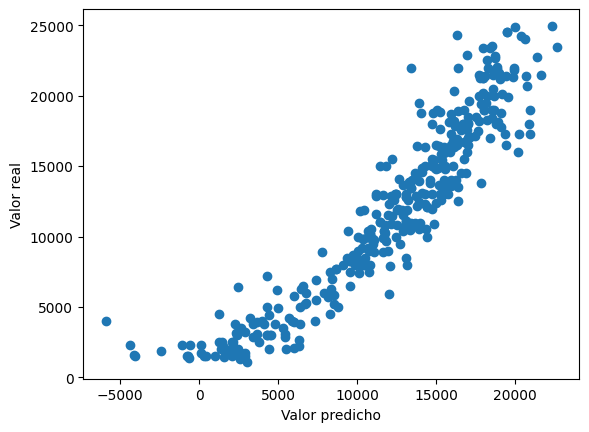

In [78]:
plt.scatter(y_pred, y_test)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.show()

Visualizamos el modelo para una mejor comprension.
Para esto realizamos otra regresion
OLS = Ordinary Least Squares

In [79]:
regr.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

coef_: matriz de coeficientes de longitud nfeatures, donde cada elemento es el coeficiente correspondiente al término de regresión para la característica de índice correspondiente.

In [80]:
regr.coef_

array([ 7.39322640e+02, -2.38704252e-02,  1.80748591e+03,  5.94883927e+01])

rank_: entero que indica el número de características únicas en el conjunto de datos utilizado para entrenar la regresión lineal.

El número de características únicas se determina mediante el análisis de la matriz de diseño (X).

In [81]:
regr.rank_

4

n_features_in: número de características utilizadas para entrenar el modelo lineal. Esto se calcula a partir de la matriz de diseño proporcionada al método de ajuste.

In [82]:
regr.n_features_in_

4

singular_: matriz de números singulares que se utiliza para calcular el rango de la matriz de diseño (X). Esta matriz contiene los valores singulares de la matriz X. Los valores singulares son los valores no nulos de la descomposición SVD de X.

Estos valores se utilizan para calcular el rango de la matriz X y ayudan a determinar si hay características redundantes en el conjunto de datos.

In [83]:
regr.singular_

array([2.19440345e+06, 9.35662764e+02, 1.15553444e+02, 1.06347933e+01])

Podemos probar a hacer el cálculo de los factores de inflación de la varianza (VIF) para evaluar la multicolinealidad de las variables.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar el DataFrame con los VIF
print("VIF:\n", vif)

VIF:
       Variable        VIF
0          Año  19.129351
1  kilometraje   3.596934
2       Cambio   1.395969
3     Potencia  18.340222


Las variables dummy están fuertemente relacionadas entre sí. Es lógico. Puedo eliminarlas y repetir el proceso.

In [85]:
X = data[['Año', 'kilometraje', 'Cambio', 'Potencia']]